In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
R = 4.7E3
C = 10E-9

In [4]:
def circuitoDerivador(s, w1, A0):
    enumerador = (-1)*w1*A0/(R*C)
    denominador = (w1/(R*C)+ s*(1/(R*C) + w1*A0) + s*s)
    return enumerador/denominador

In [5]:
f0 = 17.3
w1 = f0*2*math.pi
A0 = 1E5
spaceSizeF = 30

In [6]:
frequencies = np.logspace(-2, 9, spaceSizeF)  # log scale de 10 Hz a 1 MHz
s = 1j * frequencies

In [7]:
response = circuitoDerivador(s, w1, A0)

In [8]:
20*np.log10(np.abs(circuitoDerivador(1j*1E4+1j*11235,w1,A0)))
#Posicion de Cruce

np.float64(-3.815039454865921e-06)

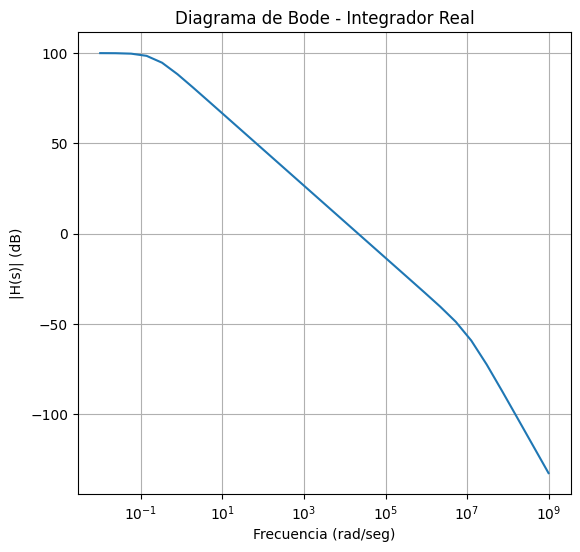

In [9]:
# Plot magnitude and phase
plt.figure(figsize=(14, 6))

# Magnitude plot
plt.subplot(1, 2, 1)
plt.plot(frequencies, 20 * np.log10(np.abs(response)))
plt.xscale('log')
plt.xlabel('Frecuencia (rad/seg)')
plt.ylabel('|H(s)| (dB)')
plt.title('Diagrama de Bode - Integrador Real')
plt.grid(True)

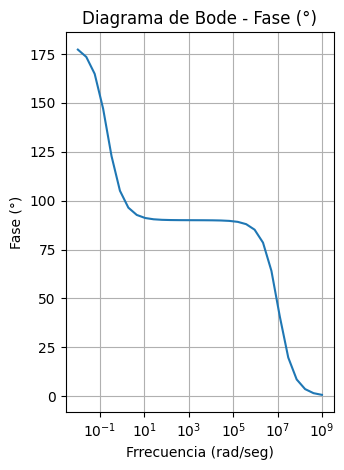

In [10]:
# Phase plot
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.angle(response, deg=True))
plt.xscale('log')
plt.xlabel('Frrecuencia (rad/seg)')
plt.ylabel('Fase (°)')
plt.title('Diagrama de Bode - Fase (°)')
plt.grid(True)

plt.tight_layout()

In [11]:
# Get coefficients for s
enum = [(-1)*w1*A0/(R*C)]
denom = [1,w1/(R*C),(1/(R*C) + w1*A0)]


In [12]:
# Calculate zeros (roots of numerator) and poles (roots of denominator)
zeros = np.roots(enum)
poles = np.roots(denom)

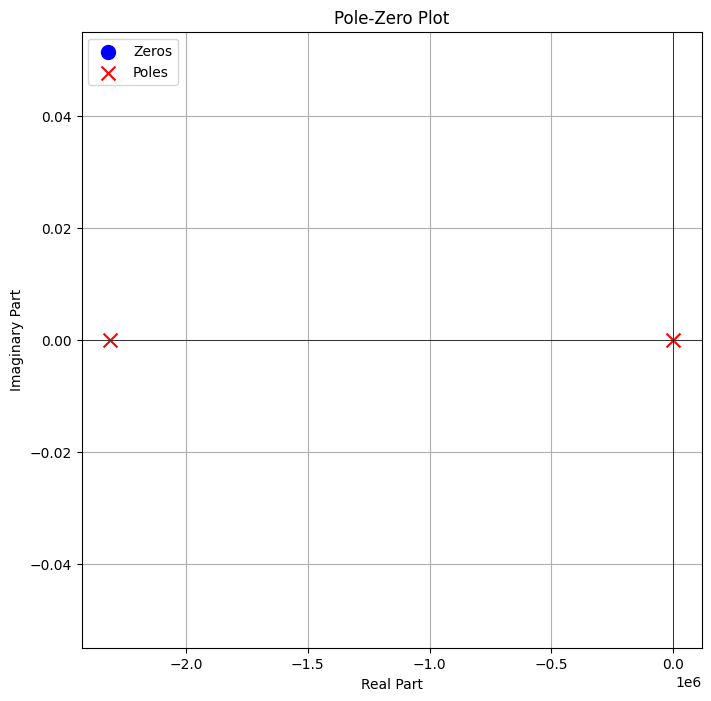

In [13]:
# Plotting poles and zeros
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Plot zeros
plt.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', s=100, label='Zeros')

# Plot poles
plt.scatter(np.real(poles), np.imag(poles), color='red', marker='x', s=100, label='Poles')

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.grid(True)
plt.legend()

#Aca hay algo muy raro. No da los hz que esperaria.

In [14]:
# Simulacion de Respuesta a integrador
iteraciones = 100
spaceSizeT = 100
deltaT = 1
t = np.linspace(0,deltaT,spaceSizeT)

In [15]:
def nArmonico(i, tiempo, frequency, fase):
    n = 2*i + 1
    coefficient = 4/n * 1/(np.pi)
    return coefficient*np.sin(n*2*np.pi*frequency*tiempo + fase)

# for j in range(20):
#     nArmonico(j,t,10)

In [16]:
def funcionCuadrada(t, f, fase, modulo):
    sum = np.empty(spaceSizeT)
    for j in range(iteraciones):
        sum += nArmonico(j,t,f,fase)
    return sum*modulo

In [17]:
cuadrada10hz = funcionCuadrada(t, 50, 0, 1)

In [18]:
frecSize = 500
def satCurve(minExpZoom, maxExpZoom, vMax):
    frecZoom = np.logspace(minExpZoom,maxExpZoom,frecSize)
    sZoom = frecZoom * 1j
    responseZoom = vMax/np.abs(circuitoDerivador(sZoom, w1, A0))

    # Plot magnitude and phase
    plt.figure(figsize=(14, 6))

    # Magnitude plot
    plt.subplot(1, 2, 1)
    plt.plot(frecZoom, responseZoom)
    plt.xscale('log')
    plt.xlabel('Frequency [rad/seg]')
    plt.ylabel('Vin Max [V]')
    plt.title(f'Curva de Saturacion [10^{minExpZoom} - 10^{maxExpZoom} rad/seg]')
    plt.grid(True)

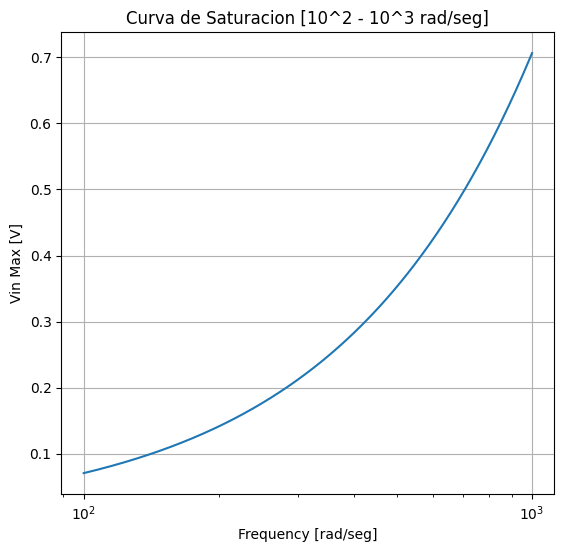

In [19]:
satCurve(2,3,15)

31.830988618379067

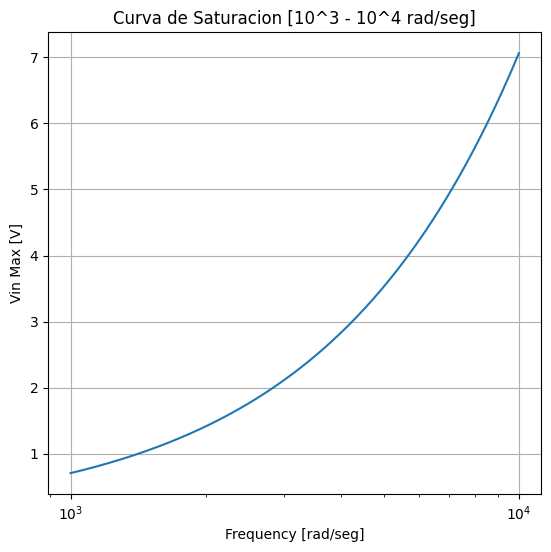

In [20]:
satCurve(3,4,15)
200*0.5/np.pi

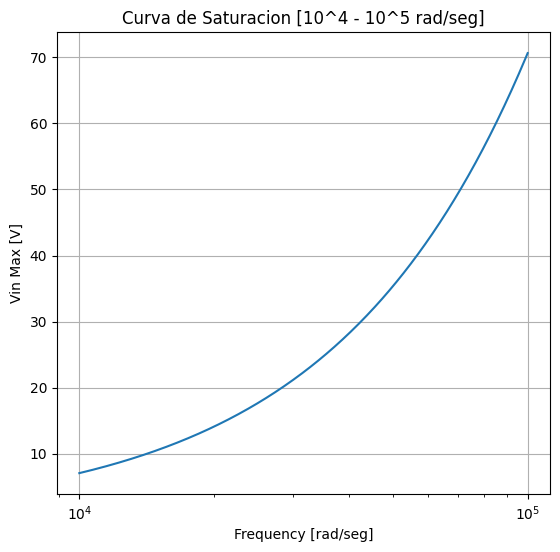

In [21]:
satCurve(4,5,15)


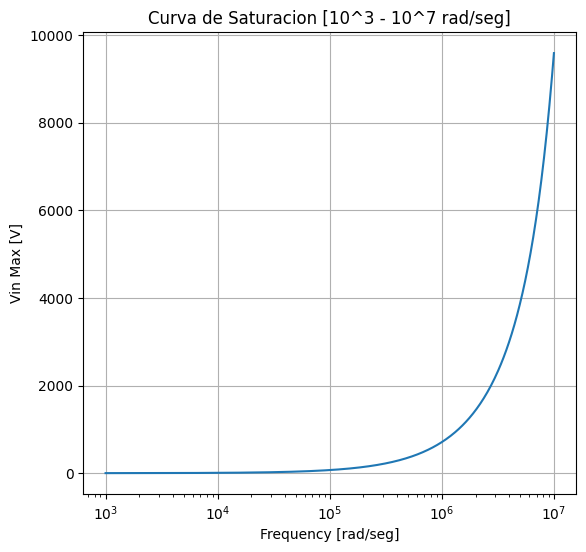

In [22]:
satCurve(3,7,15)

In [23]:
# CUADRADA - Region de Operacion Practica!
# 0.3V = 50Hz
# 0.6V = 100Hz
# 1V = 170 Hz
# 2V = 340 Hz
# 5V = 920 Hz
# 10V = 1.7 kHz
# 15V = 2.6 kHz
# 20V = 3.5 kHz